## Sentiment Analysis of Video Game Reviews using ML

### Naive Bayes Classifier  

In [6]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV



In [13]:
# Visualize y_train file (categories / labels)
ytr = np.load ("y_train.npy")
y = ytr.ravel()          # Note: the .rave will convert that array shape to (n,) (transpose it)
#y



In [14]:
## Visualize X_train file
# with open('X_train.txt','r',encoding = 'utf8') as f:
#    for line in f:
#        print(line)


Pre-processing

In [16]:
# Assigning each review comment into an element of an array
x = np.array([])
x = open('X_train.txt','r',encoding = 'utf8')
x = x.read().splitlines() 
#x


In [17]:
#Splitting the X_train data into train and test using 70%/30% split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.30, random_state = 123, shuffle = True)

In [18]:
# Checking lenght of the subsets
len(x_train)
#len(x_test)
#len(y_train)
#len(y_test)

700

In [19]:
# Defining categories:  Positive Review  = 1 , Negative Review = 0
categories = np.array(["1", "0"])

In [20]:
# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(min_df=2),MultinomialNB(alpha = 0.35, fit_prior = True, class_prior=[0.45,0.55]))

In [21]:
# Train model
nbmodel = model.fit(x_train, y_train)

In [22]:
# Test the model (predict)
y_pred = nbmodel.predict(x_test)
len(y_pred)


300

In [23]:
# Display predicted lables for x_test
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], d

<AxesSubplot:>

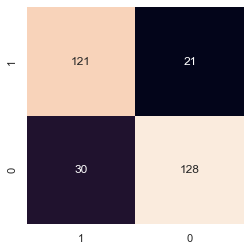

In [24]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T , square = True , annot = True, fmt = 'd', cbar = False, xticklabels = categories , yticklabels = categories)


In [25]:
# Evaluate model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83

In [26]:
# Test the 792 reviews from the X_test file with unknown labels.

x2 = np.array([])
x2 = open('X_test.txt','r',encoding = 'utf8')
x2 = x2.read().splitlines() 
x2

y_pred2 = nbmodel.predict(x2)
len(y_pred2)

792

In [62]:
# Display prediction of the 792 reviews (0 = Negative, 1 = Positive)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [28]:
# Convert array to csv file using pandas
pd.DataFrame(y_pred2).to_csv("C:/Users/Checo/Desktop/projectum/github_repos/2022/gameVibe/predictions.csv", header = ['label'])